# Introduction to data cleaning
In this workshop, we will introduce a commonly-used data cleaning packages in Python(`pandas`) and a easy-to-use data visualization package(`seaborn`).

## Overview
**pandas** is a fast, powerful, flexible and easy to use open source data analysis and data manipulation library built on top of the Python programming language. It is featured by DataFrame, a two-dimensional data structure with columns of potentially different types. It is similar to a Excel sheet or Matlab table, which is easy to understand and visualize.

**seaborn** is a Python data visualization library based on **matplotlib**. It provides a high-level interface for drawing attractive and informative statistical graphics.

## Outline of the workshop
1. Crash course of python
2. Data cleaning with pandas
3. Data visualization with seaborn

## Crash course of python
This part is discussion-based.

## Data cleaning with pandas
Prerequisites: If you do not have pandas installed, please type the following command in your terminal: `!pip install pandas`

In [24]:
# load data
import pandas as pd
# data = pd.read_csv('data.csv')
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Math': [85, 90, 78, 88, 92],
    'Science': [89, 94, 76, 85, 91],
    'English': [93, 88, 82, 87, 90]
}
data = pd.DataFrame(data)
data.head()

,Name,Math,Science,English
0,Alice,85,89,93
1,Bob,90,94,88
2,Charlie,78,76,82
3,David,88,85,87
4,Eve,92,91,90


In [4]:
a = [1, 2, 3, 4, 5]
a[0]

1

In [25]:
import numpy as np
# drop columns/select columns
# data.drop(columns=['English'])
# data = data[['Math', 'Science']]

# index
# data.loc[[1], ['Math', 'Science']]
data.iloc[0,1] = np.nan
data.head()

# # drop rows with missing values
# data.head()

,Name,Math,Science,English
0,Alice,NaN,89,93
1,Bob,90.0,94,88
2,Charlie,78.0,76,82
3,David,88.0,85,87
4,Eve,92.0,91,90


In [26]:
data = data.dropna(subset=['Math'])
data.head()

,Name,Math,Science,English
1,Bob,90.0,94,88
2,Charlie,78.0,76,82
3,David,88.0,85,87
4,Eve,92.0,91,90


In [17]:
?data.dropna

Signature: data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
Docstring:
Remove missing values.

See the :ref:`User Guide <missing_data>` for more on which values are
considered missing, and how to work with missing data.

Parameters
----------
axis : {0 or 'index', 1 or 'columns'}, default 0
    Determine if rows or columns which contain missing values are
    removed.

    * 0, or 'index' : Drop rows which contain missing values.
    * 1, or 'columns' : Drop columns which contain missing value.

    .. versionchanged:: 1.0.0

       Pass tuple or list to drop on multiple axes.
       Only a single axis is allowed.

how : {'any', 'all'}, default 'any'
    Determine if row or column is removed from DataFrame, when we have
    at least one NA or all NA.

    * 'any' : If any NA values are present, drop that row or column.
    * 'all' : If all values are NA, drop that row or column.

thresh : int, optional
    Require that many non-NA values.
subset : array-like, opt

- `pd.melt()`: to convert data from wide to long format.
- `pd.pivot()`: to convert data from long to wide format.

In [3]:
data_wide = {\
    'id': [1, 2, 3],
    'name': ['Alice', 'Bob', 'Charlie'],
    'math': [90, 85, 88],
    'science': [88, 89, 85],
    'english': [85, 87, 90],
    }

df_wide = pd.DataFrame(data_wide)
df_wide

,id,name,math,science,english
0,1,Alice,90,88,85
1,2,Bob,85,89,87
2,3,Charlie,88,85,90


In [5]:
# id_vars: columns to keep as is, will have repeated values after melt
# var_name: name of the new column that will contain the column names of the wide dataframe
# value_name: name of the new column that will contain the values of the wide dataframe
df_long = pd.melt(df_wide, id_vars=['id', 'name'], var_name='subject', value_name='score')
df_long

,id,name,subject,score
0,1,Alice,math,90
1,2,Bob,math,85
2,3,Charlie,math,88
3,1,Alice,science,88
4,2,Bob,science,89
5,3,Charlie,science,85
6,1,Alice,english,85
7,2,Bob,english,87
8,3,Charlie,english,90


Next, we will convert the data from long to wide format

In [7]:
# index: column to use as index, with repeated values under each conditions
# columns: columns contain the wide dataframe column names
# values: columns contain the wide dataframe values
df_wide2 = df_long.pivot(index='id', columns='subject', values='score')
df_wide2.reset_index(inplace=True)
df_wide2.columns.name = None
df_wide2

,id,english,math,science
0,1,85,90,88
1,2,87,85,89
2,3,90,88,85


## Data visualization with seaborn

If you haven't install seaborn, run the following command in your terminal: \
`pip install seaborn` \
`pip install matplotlib`

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
# Load the example tips dataset
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


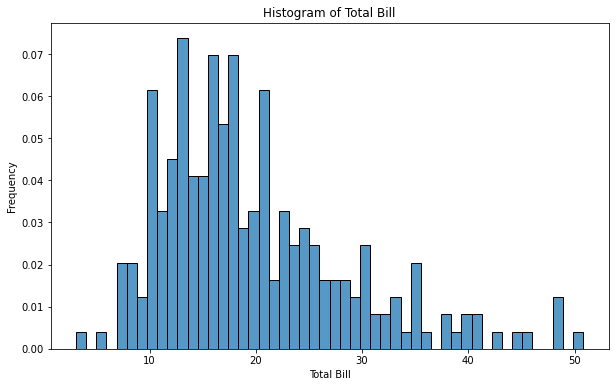

In [41]:
# Draw a histogram
plt.figure(figsize=(10, 6))
# kde: whether to plot a gaussian kernel density estimate
# stat: 
    # count: show the number of observations in each bin
    # frequency: show the number of observations divided by the bin width
    # probability or proportion: normalize such that bar heights sum to 1
    # density: normalize such that the total area of the histogram equals 1
# bins: number of bins
sns.histplot(tips['total_bill'], kde=False, stat='probability', bins=50)
plt.title('Histogram of Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.show()

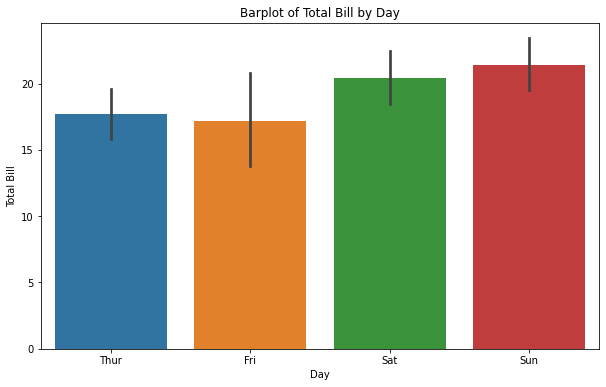

In [23]:
# Draw a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='day', y='total_bill', data=tips)
plt.title('Barplot of Total Bill by Day')
plt.xlabel('Day')
plt.ylabel('Total Bill')
plt.show()

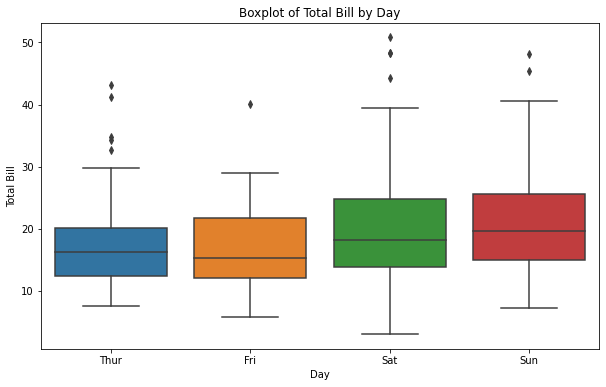

In [25]:
# Draw a boxplot
#   center line: median
#   box: interquartile range (IQR)
#   whiskers: 1.5 * IQR
#   points: outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='day', y='total_bill', data=tips)
plt.title('Boxplot of Total Bill by Day')
plt.xlabel('Day')
plt.ylabel('Total Bill')
plt.show()

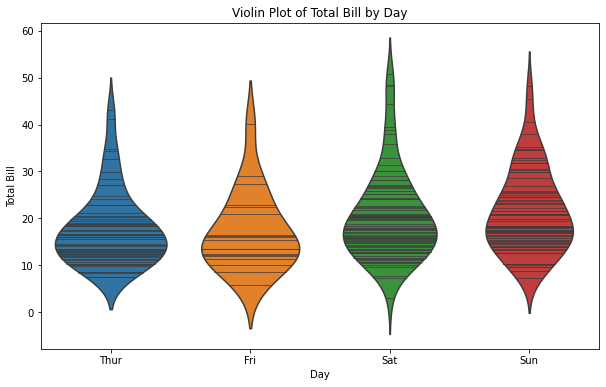

In [45]:
# Draw a violin plot
# a way to visualize the probability density function
# inner{“box”, “quart”, “point”, “stick”, None}
#     Representation of the data in the violin interior. One of the following:
#     "box": draw a miniature box-and-whisker plot
#     "quart": show the quartiles of the data
#     "point" or "stick": show each observation
# bw_method{“scott”, “silverman”, float}
    # Either the name of a reference rule or the scale factor to use when 
    # computing the kernel bandwidth. The actual kernel size will be determined 
    # by multiplying the scale factor by the standard deviation of the data within 
    # each group.
plt.figure(figsize=(10, 6))
sns.violinplot(x='day', y='total_bill', data=tips, inner='stick')
plt.title('Violin Plot of Total Bill by Day')
plt.xlabel('Day')
plt.ylabel('Total Bill')
plt.show()

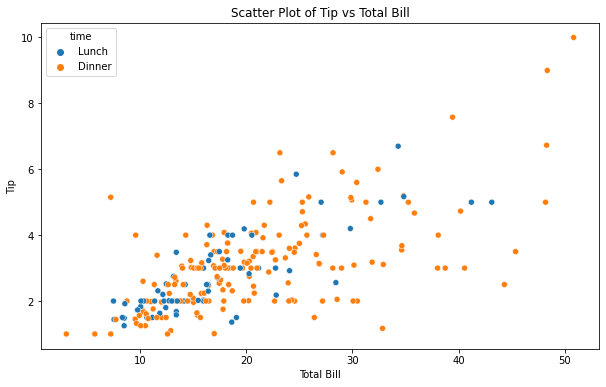

In [48]:
# Draw a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_bill', y='tip', hue = 'time', data=tips)
# sns.regplot(x='total_bill', y='tip', data=tips)
plt.title('Scatter Plot of Tip vs Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

In [36]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

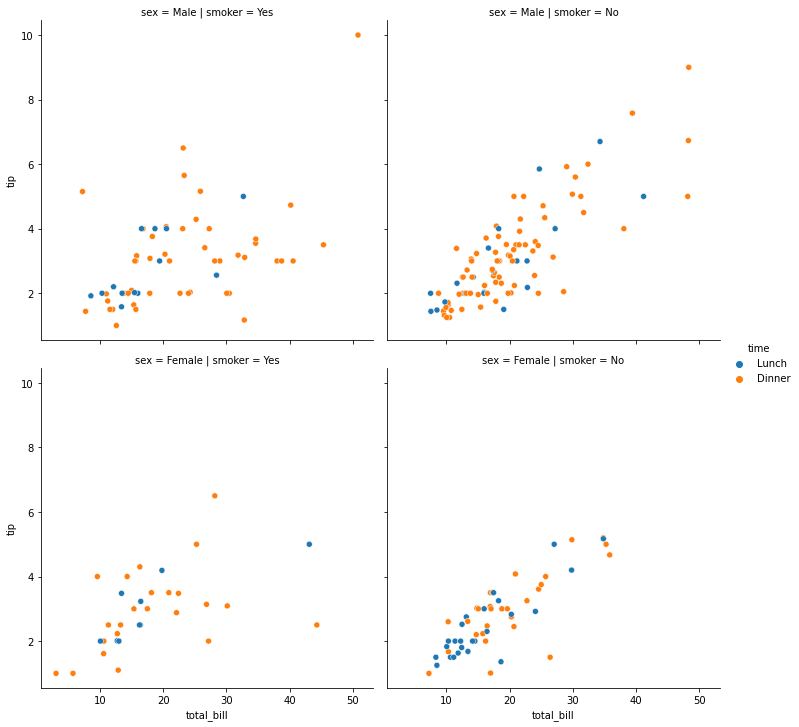

In [37]:
sns.relplot(x='total_bill', y='tip', hue = 'time', 
            row = "sex", col = "smoker",
            kind = "scatter", data=tips)